This project analyzes my personal gaming habits using data from Google Play Games. By examining playtime and experience points across different games, I aimed to uncover insights into my gaming preferences and engagement levels.

I collected data through Google Takeout, which provided information on the games I play, my total playtime, and experience points earned. The analysis focused on identifying the most and least played games, as well as the distribution of experience points across various game categories.


In [1]:
pip install pandas beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [37]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Define the path to your extracted Google Takeout folder
folder_path = r'C:\Users\steph\Downloads\DATA ANALYTICS PROJECTS\My Games Habits Analysis\My Games\games'

# List all game folders
game_folders = os.listdir(folder_path)

# Function to parse HTML files
def parse_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
    return soup

# Initialize a list to store data
data = []

# Loop through each game folder
for game_folder in game_folders:
    game_path = os.path.join(folder_path, game_folder)
    if os.path.isdir(game_path):
        # List all HTML files in the game folder
        html_files = [f for f in os.listdir(game_path) if f.endswith('.html')]
        
        game_data = {'Game': game_folder}
        
        for html_file in html_files:
            file_path = os.path.join(game_path, html_file)
            soup = parse_html(file_path)
            
            # Extract relevant data based on the type of HTML file
            if 'Achievements' in html_file:
                achievements = soup.find_all('tr')[1:]  # Skip header row
                achievements_data = []
                for row in achievements:
                    cells = row.find_all('td')
                    achievement = {'Type': 'Achievement', 'Name': cells[1].text}
                    if len(cells) > 2:
                        achievement['Date'] = cells[2].text
                    achievements_data.append(achievement)
                game_data['Achievements'] = achievements_data
            
            elif 'Activity' in html_file:
                activities = soup.find_all('tr')[1:]
                activities_data = [{'Field': row.find_all('td')[0].text, 'Value': row.find_all('td')[1].text} for row in activities]
                game_data['Activity'] = activities_data
                print(f"Game: {game_folder}, Activity Data: {activities_data}")  # Debug print
            
            elif 'Experience' in html_file:
                experiences = soup.find_all('tr')[1:]
                experiences_data = [{'Field': row.find_all('td')[0].text, 'Value': row.find_all('td')[1].text} for row in experiences]
                game_data['Experience'] = experiences_data
            
            elif 'Scores' in html_file:
                scores = soup.find_all('tr')[1:]
                scores_data = [{'Leaderboard': row.find_all('td')[0].text, 'Score': row.find_all('td')[3].text} for row in scores]
                game_data['Scores'] = scores_data
        
        data.append(game_data)

# Convert to DataFrame
games_df = pd.DataFrame(data)
print(games_df.head())

Game: Bullet Echo, Activity Data: [{'Field': 'Time First Played', 'Value': '2023-11-25T12:51:49Z'}, {'Field': 'Time Last Played', 'Value': '2023-12-08T15:48:34Z'}, {'Field': 'Client IDs used to play the game', 'Value': '106596746349-mbg26vdg2apv1dbolooqvad0kmvo9vte.apps.googleusercontent.com'}]
Game: EA SPORTS FC™ MOBILE 24, Activity Data: [{'Field': 'Time First Played', 'Value': '2023-04-27T17:12:34Z'}, {'Field': 'Time Last Played', 'Value': '2023-05-06T07:01:19Z'}, {'Field': 'Client IDs used to play the game', 'Value': '417581119372-kbfrmq41jddmv4aolnd81r2hkjnuvgak.apps.googleusercontent.com'}]
Game: Galaxy Attack-Space Shooter 2, Activity Data: [{'Field': 'Time First Played', 'Value': '2023-07-30T06:20:57Z'}, {'Field': 'Time Last Played', 'Value': '2023-09-16T19:16:15Z'}, {'Field': 'Client IDs used to play the game', 'Value': '798166462991-ft4i4jfb0u54nt5otcmnfakco1t3hmhu.apps.googleusercontent.com'}]
Game: Google Play Games, Activity Data: [{'Field': 'Time First Played', 'Value': '

In [9]:
# Count the number of games
num_games = len(games_df)
print(f'Total number of games: {num_games}')

Total number of games: 14


In [10]:
# Initialize a list to store achievement counts
achievement_counts = []

for game in data:
    game_name = game['Game']
    achievements = game.get('Achievements', [])
    achievement_count = len(achievements)
    achievement_counts.append({'Game': game_name, 'Achievements': achievement_count})

# Convert to DataFrame
achievements_df = pd.DataFrame(achievement_counts)
print(achievements_df)


                             Game  Achievements
0                     Bullet Echo             0
1         EA SPORTS FC™ MOBILE 24             0
2   Galaxy Attack-Space Shooter 2             0
3               Google Play Games             0
4                       Hero Wars             0
5                Idle Bank Tycoon             0
6             Klondike Adventures             0
7        Need for Speed No Limits             3
8                     Pickle Pete             0
9                   Pocket Champs             0
10                 Shadow Fight 3             0
11                    Survivor.io             0
12                       Township             9
13                       Two Dots             6


In [36]:
# Extract play activity details
activity_details = []

for game in data:
    game_name = game['Game']
    activities = game.get('Activity', [])
    for activity in activities:
        activity['Game'] = game_name
        activity_details.append(activity)

# Convert to DataFrame
activity_df = pd.DataFrame(activity_details)
print(activity_df)


                                    Field  \
0                       Time First Played   
1                        Time Last Played   
2        Client IDs used to play the game   
3                       Time First Played   
4                        Time Last Played   
5        Client IDs used to play the game   
6                       Time First Played   
7                        Time Last Played   
8        Client IDs used to play the game   
9                       Time First Played   
10                       Time Last Played   
11       Client IDs used to play the game   
12  Total number of achievements unlocked   
13                      Experience points   
14                      Time First Played   
15                       Time Last Played   
16                      Time First Played   
17                       Time Last Played   
18       Client IDs used to play the game   
19                     Unique days played   
20                      Time First Played   
21        

                            Game      Playtime
0                    Bullet Echo  18896.750000
1        EA SPORTS FC™ MOBILE 24  12348.750000
2  Galaxy Attack-Space Shooter 2  69895.300000
3              Google Play Games  73318.666667
4                      Hero Wars      0.000000


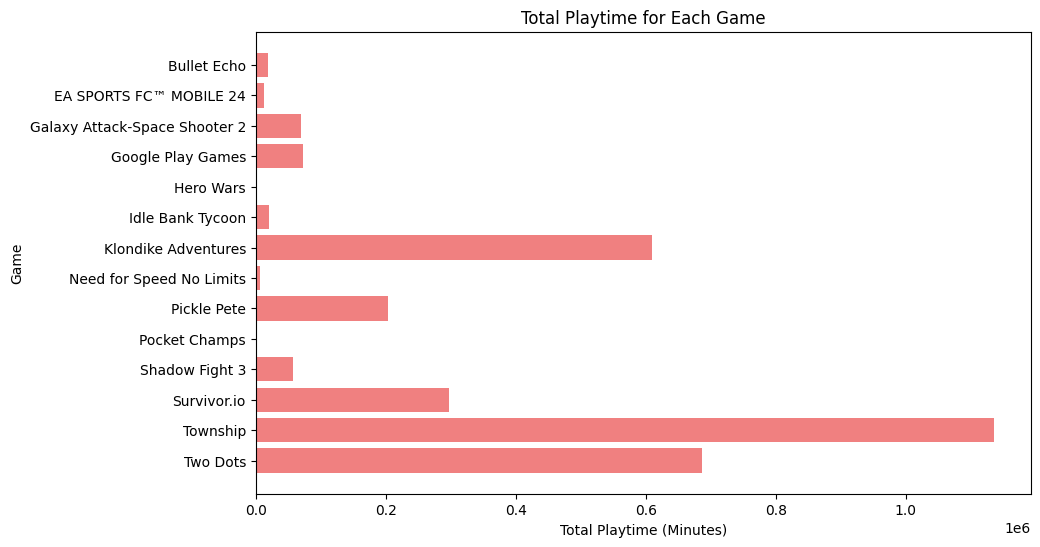

In [38]:
# Extract playtime details if available
playtime_data = []

for game in data:
    game_name = game['Game']
    activities = game.get('Activity', [])
    # Initialize variables for playtime calculation
    first_played = None
    last_played = None
    for activity in activities:
        field = activity['Field'].lower()
        value = activity['Value']
        if 'time first played' in field:
            first_played = pd.to_datetime(value, errors='coerce')
        elif 'time last played' in field:
            last_played = pd.to_datetime(value, errors='coerce')
    if first_played and last_played:
        playtime = (last_played - first_played).total_seconds() / 60  # Convert to minutes
        playtime_data.append({'Game': game_name, 'Playtime': playtime})

# Convert to DataFrame
playtime_df = pd.DataFrame(playtime_data)

# Check the extracted playtime data
print(playtime_df.head())

# Check if 'Playtime' column exists
if 'Playtime' in playtime_df.columns:
    # Convert Playtime to numeric if necessary
    playtime_df['Playtime'] = pd.to_numeric(playtime_df['Playtime'], errors='coerce')

    # Plot the playtime distribution
    plt.figure(figsize=(10, 6))
    plt.barh(playtime_df['Game'], playtime_df['Playtime'], color='lightcoral')
    plt.xlabel('Total Playtime (Minutes)')
    plt.ylabel('Game')
    plt.title('Total Playtime for Each Game')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("The 'Playtime' column does not exist in the DataFrame.")


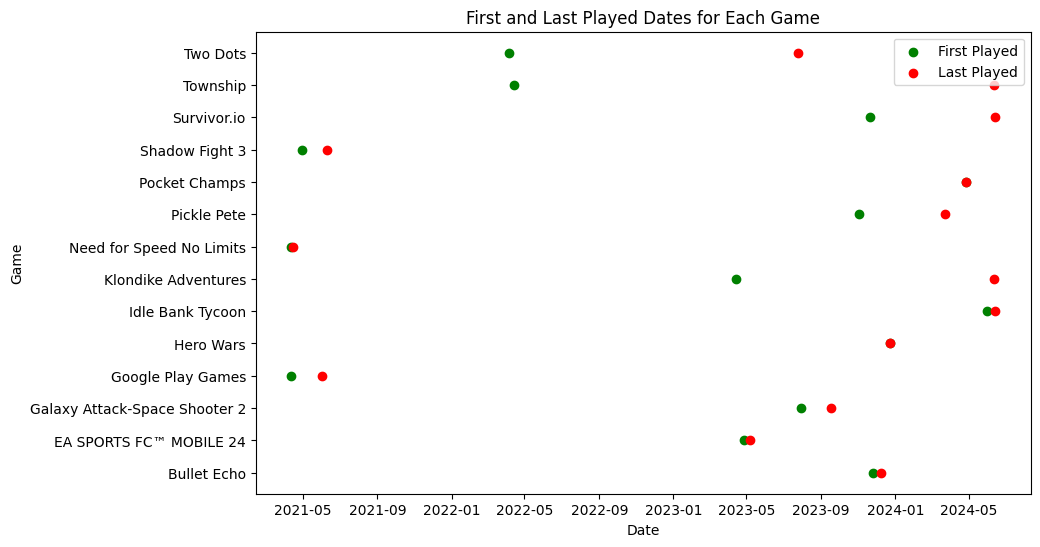

In [34]:
# Convert dates to datetime format
activity_df['Value'] = pd.to_datetime(activity_df['Value'], errors='coerce')

# Filter for 'Time First Played' and 'Time Last Played'
first_played = activity_df[activity_df['Field'] == 'Time First Played']
last_played = activity_df[activity_df['Field'] == 'Time Last Played']

# Merge the two dataframes
play_activity_df = first_played.merge(last_played, on='Game', suffixes=('_first', '_last'))

# Plot the play activity timeline
plt.figure(figsize=(10, 6))

# Plot first played
plt.scatter(play_activity_df['Value_first'], play_activity_df['Game'], color='green', label='First Played')

# Plot last played
plt.scatter(play_activity_df['Value_last'], play_activity_df['Game'], color='red', label='Last Played')

plt.xlabel('Date')
plt.ylabel('Game')
plt.title('First and Last Played Dates for Each Game')
plt.legend()
plt.show()

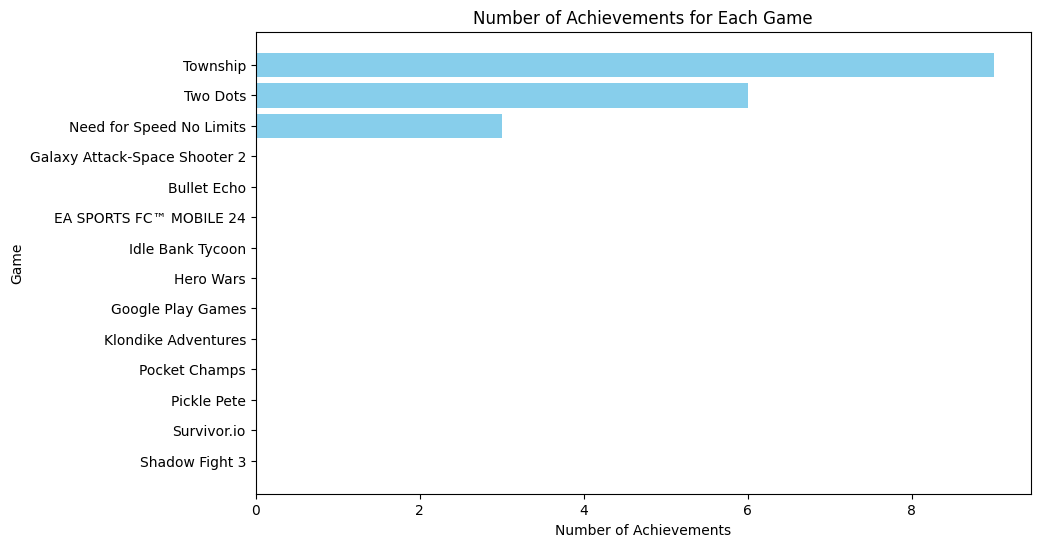

In [35]:
import matplotlib.pyplot as plt

# Sort by the number of achievements
achievements_df = achievements_df.sort_values(by='Achievements', ascending=False)

# Plot the number of achievements for each game
plt.figure(figsize=(10, 6))
plt.barh(achievements_df['Game'], achievements_df['Achievements'], color='skyblue')
plt.xlabel('Number of Achievements')
plt.ylabel('Game')
plt.title('Number of Achievements for Each Game')
plt.gca().invert_yaxis()
plt.show()


<Figure size 1200x600 with 0 Axes>

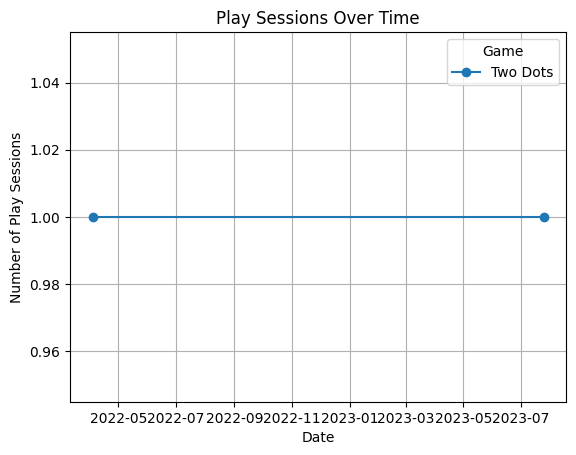

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Specific game data for two dots
game_data = [
    {
        'Game': 'Two Dots',
        'Activity': [
            {'Field': 'Time First Played', 'Value': '2022-04-04T20:08:44Z'},
            {'Field': 'Time Last Played', 'Value': '2023-07-25T13:44:07Z'},
            {'Field': 'Client IDs used to play the game', 'Value': '964342547573-dfdu414rdoacgev2710lv14j85tk8dn9.apps.googleusercontent.com'},
            {'Field': 'Total number of achievements unlocked', 'Value': '6'},
            {'Field': 'Experience points', 'Value': '6000'},
            {'Field': 'Last Achievement update time', 'Value': '2022-04-08T18:06:23Z'}
        ],
        'Achievements': [
            {'Type': 'Achievement', 'Name': 'Unlocked', 'Date': '0'},
            {'Type': 'Achievement', 'Name': 'Unlocked', 'Date': '0'},
            {'Type': 'Achievement', 'Name': 'Unlocked', 'Date': '0'},
            {'Type': 'Achievement', 'Name': 'Unlocked', 'Date': '0'},
            {'Type': 'Achievement', 'Name': 'Unlocked', 'Date': '0'},
            {'Type': 'Achievement', 'Name': 'Unlocked', 'Date': '0'}
        ],
        'Experience': [
            {'Field': 'Achievement unlocked', 'Value': 'Bon Voyage!'},
            {'Field': 'Achievement unlocked', 'Value': 'Get Connected'},
            {'Field': 'Achievement unlocked', 'Value': 'Your First Square'},
            {'Field': 'Achievement unlocked', 'Value': 'Bomb Super Move'},
            {'Field': 'Achievement unlocked', 'Value': 'Bottom of the Ocean'},
            {'Field': 'Achievement unlocked', 'Value': 'Shuffle Things Up!'},
            {'Field': 'Level up', 'Value': 'Level 3 achieved'},
            {'Field': 'Level up', 'Value': 'Level 4 achieved'}
        ]
    },
    # Add more game data as needed
]

# Extract play session times
play_sessions = []

for game in game_data:
    game_name = game['Game']
    activities = game.get('Activity', [])
    for activity in activities:
        if activity['Field'] in ['Time First Played', 'Time Last Played']:
            play_sessions.append({'Game': game_name, 'Date': pd.to_datetime(activity['Value'], errors='coerce')})

# Convert to DataFrame
play_sessions_df = pd.DataFrame(play_sessions)

# Drop any rows with missing dates
play_sessions_df = play_sessions_df.dropna(subset=['Date'])

# Count play sessions by date
play_sessions_count = play_sessions_df.groupby([play_sessions_df['Date'].dt.date, 'Game']).size().unstack().fillna(0)

# Plot play sessions over time
plt.figure(figsize=(12, 6))
play_sessions_count.plot(kind='line', marker='o')
plt.title('Play Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Play Sessions')
plt.legend(title='Game')
plt.grid(True)
plt.show()




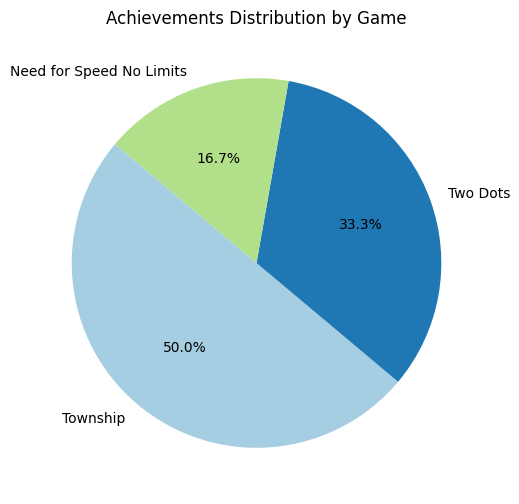

In [43]:
# Count achievements by game
achievement_count_by_game = achievement_dates_df['Game'].value_counts()

# Plot the distribution of achievements by game (pie chart)
plt.figure(figsize=(10, 6))
achievement_count_by_game.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Achievements Distribution by Game')
plt.ylabel('')  # Hide the y-label
plt.show()


C:\Users\steph\AppData\Local\Temp\ipykernel_48544\42217021.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  play_times_df['MonthYear'] = play_times_df['DateTime'].dt.to_period('M')


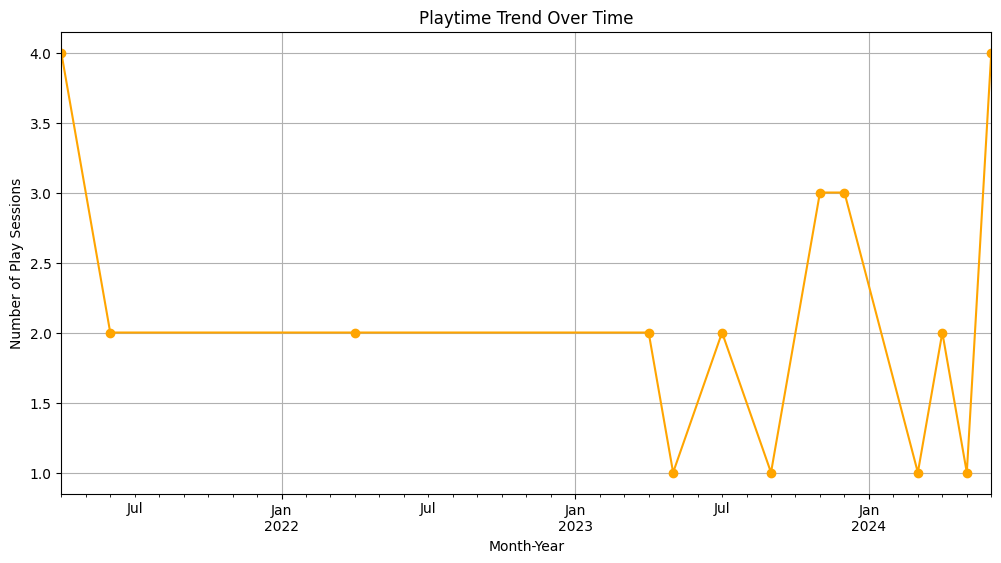

In [44]:
# Aggregate playtime by month
play_times_df['MonthYear'] = play_times_df['DateTime'].dt.to_period('M')
playtime_trend = play_times_df.groupby('MonthYear').size()

# Plot the playtime trend
plt.figure(figsize=(12, 6))
playtime_trend.plot(kind='line', marker='o', color='orange')
plt.title('Playtime Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Play Sessions')
plt.grid(True)
plt.show()


In [45]:
# Define the path to the Global folder
folder_path = r'C:\Users\steph\Downloads\DATA ANALYTICS PROJECTS\My Games Habits Analysis\Global'

# Check if the path exists
if not os.path.exists(folder_path):
    raise FileNotFoundError(f"The specified path does not exist: {folder_path}")

# List all HTML files in the Global folder
html_files = [f for f in os.listdir(folder_path) if f.endswith('.html')]

# Initialize a list to store data
global_data = []

# Function to parse HTML files
def parse_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
    return soup

# Parse the Player.html file
for html_file in html_files:
    file_path = os.path.join(folder_path, html_file)
    soup = parse_html(file_path)
    
    # Extract playtime from the 'Per Category Statistics' section
    category_stats = soup.find_all('table')[2]  # Assuming it's the third table
    rows = category_stats.find_all('tr')[1:]  # Skip header row
    
    for row in rows:
        cells = row.find_all('td')
        category = cells[0].text.strip()
        playtime = int(cells[1].text.strip()) if cells[1].text.strip().isdigit() else 0
        global_data.append({'Category': category, 'Playtime': playtime})

# Convert to DataFrame
playtime_df = pd.DataFrame(global_data)

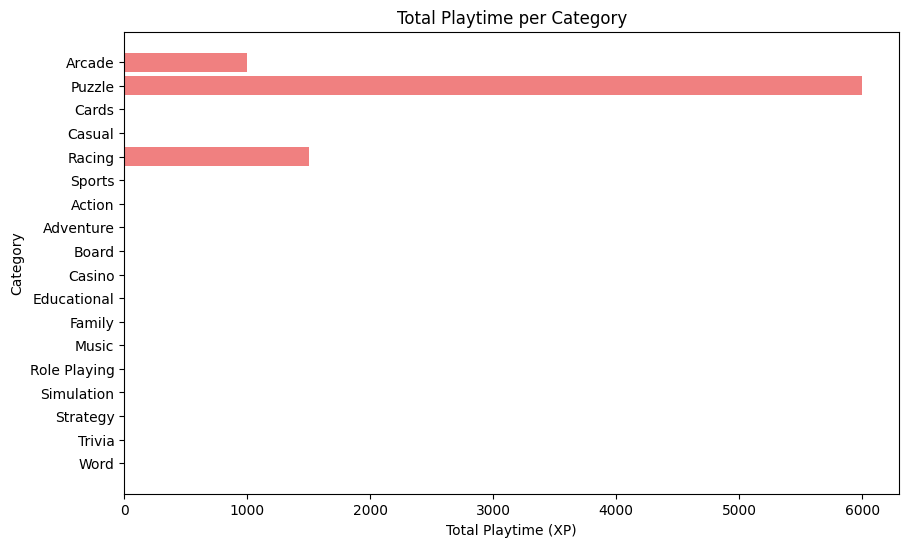

In [46]:
# Plot the playtime distribution
plt.figure(figsize=(10, 6))
plt.barh(playtime_df['Category'], playtime_df['Playtime'], color='lightcoral')
plt.xlabel('Total Playtime (XP)')
plt.ylabel('Category')
plt.title('Total Playtime per Category')
plt.gca().invert_yaxis()
plt.show()

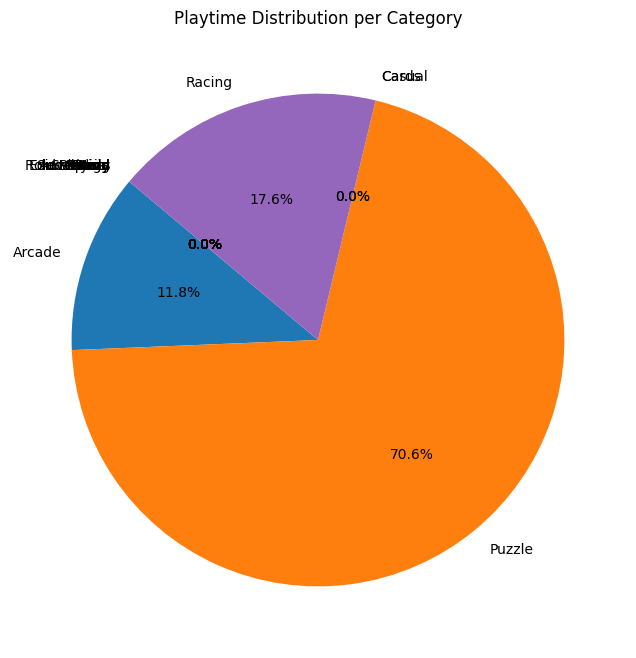

In [47]:
# Plot the playtime distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(playtime_df['Playtime'], labels=playtime_df['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Playtime Distribution per Category')
plt.show()